In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/Users/antoninbenard/PycharmProjects/land_value_prediction/data/df_vf_idf_clean.csv", sep=",", low_memory=False)

## Checkup des données

In [9]:
df.head()

date_mutation                     nature_mutation  valeur_fonciere  \
0    2020-07-01                               Vente         246600.0   
1    2020-07-01                               Vente         184520.0   
2    2020-07-01                               Vente         164000.0   
3    2020-07-01                               Vente        2000000.0   
4    2020-07-01  Vente en l'état futur d'achèvement         585000.0   

        adresse_nom_voie  code_postal  code_commune             nom_commune  \
0  SEN DES LONGUES RAIES      77670.0         77419            Saint-Mammès   
1      AV HENRI BARBUSSE      94240.0         94038         L'Haÿ-les-Roses   
2     AV ROUGET DE LISLE      94400.0         94081         Vitry-sur-Seine   
3        RUE SAINT LOUIS      78000.0         78646              Versailles   
4               LE MANET      78180.0         78423  Montigny-le-Bretonneux   

   code_departement  nombre_lots  code_type_local  ... longitude   latitude  \
0                77            0                1  ...  2.817040  48.383233   
1                94            2                2  ...  2.328166  48.780891   
2                94            1                2  ...  2.395257  48.779350   
3                78            0                1  ...  2.127896  48.794210   
4                78            1                2  ...  2.024012  48.767701   

   annee  mois  trimestre       prix_m2                          quartier  \
0   2020     7          3   2348.571429            Saint-Mammès (77670.0)   
1   2020     7          3   3417.037037         L'Haÿ-les-Roses (94240.0)   
2   2020     7          3   4315.789474         Vitry-sur-Seine (94400.0)   
3   2020     7          3  10928.961749              Versailles (78000.0)   
4   2020     7          3   4875.000000  Montigny-le-Bretonneux (78180.0)   

                  quartier_detaille  prix_median_m2  ecart_prix_median_pct  
0            Saint-Mammès (77670.0)     2502.013809              -6.132755  
1         L'Haÿ-les-Roses (94240.0)     4109.589041             -16.852099  
2         Vitry-sur-Seine (94400.0)     4396.296296              -1.831242  
3              Versailles (78000.0)     7068.965517              54.604825  
4  Montigny-le-Bretonneux (78180.0)     4166.666667              17.000000  

[5 rows x 24 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815674 entries, 0 to 815673
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_mutation              815674 non-null  object 
 1   nature_mutation            815674 non-null  object 
 2   valeur_fonciere            815674 non-null  float64
 3   adresse_nom_voie           815671 non-null  object 
 4   code_postal                815666 non-null  float64
 5   code_commune               815674 non-null  int64  
 6   nom_commune                815674 non-null  object 
 7   code_departement           815674 non-null  int64  
 8   nombre_lots                815674 non-null  int64  
 9   code_type_local            815674 non-null  int64  
 10  type_local                 815674 non-null  object 
 11  surface_reelle_bati        815674 non-null  float64
 12  nombre_pieces_principales  815674 non-null  float64
 13  surface_terrain            25

In [18]:
df.describe(include="all")

date_mutation nature_mutation  valeur_fonciere adresse_nom_voie  \
count         815674          815674     8.156740e+05           815671   
unique          1597               6              NaN            42651   
top       2025-03-31           Vente              NaN     RUE DE PARIS   
freq            1899          761900              NaN             4957   
mean             NaN             NaN     3.885034e+05              NaN   
std              NaN             NaN     3.431916e+05              NaN   
min              NaN             NaN     5.200000e+03              NaN   
25%              NaN             NaN     1.975000e+05              NaN   
50%              NaN             NaN     2.972400e+05              NaN   
75%              NaN             NaN     4.520000e+05              NaN   
max              NaN             NaN     1.050000e+07              NaN   

          code_postal   code_commune               nom_commune  \
count   815666.000000  815674.000000                    815674   
unique            NaN            NaN                      1282   
top               NaN            NaN  Paris 15e Arrondissement   
freq              NaN            NaN                     15896   
mean     85761.437348   85668.558658                       NaN   
std       8349.458839    8257.567239                       NaN   
min      75001.000000   75101.000000                       NaN   
25%      77300.000000   77262.000000                       NaN   
50%      91300.000000   91330.000000                       NaN   
75%      93270.000000   93050.000000                       NaN   
max      95880.000000   95690.000000                       NaN   

        code_departement    nombre_lots  code_type_local  ...      longitude  \
count      815674.000000  815674.000000    815674.000000  ...  803923.000000   
unique               NaN            NaN              NaN  ...            NaN   
top                  NaN            NaN              NaN  ...            NaN   
freq                 NaN            NaN              NaN  ...            NaN   
mean           85.478002       1.075450         1.688672  ...       2.361872   
std             8.288990       0.942391         0.463037  ...       0.249773   
min            75.000000       0.000000         1.000000  ...       1.453111   
25%            77.000000       0.000000         1.000000  ...       2.247974   
50%            91.000000       1.000000         2.000000  ...       2.344335   
75%            93.000000       2.000000         2.000000  ...       2.474403   
max            95.000000      23.000000         2.000000  ...       3.518413   

             latitude          annee           mois      trimestre  \
count   803923.000000  815674.000000  815674.000000  815674.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        48.829523    2022.185394       6.756755       2.576424   
std          0.144005       1.435164       3.385262       1.103759   
min         48.125164    2020.000000       1.000000       1.000000   
25%         48.785177    2021.000000       4.000000       2.000000   
50%         48.854030    2022.000000       7.000000       3.000000   
75%         48.906987    2023.000000      10.000000       4.000000   
max         49.236552    2025.000000      12.000000       4.000000   

              prix_m2                            quartier  quartier_detaille  \
count   815674.000000                              815674             815674   
unique            NaN                                1309               1290   
top               NaN  Paris 15e Arrondissement (75015.0)          Paris .0e   
freq              NaN                               15896             149335   
mean      5933.265559                                 NaN                NaN   
std       3585.357897                      

In [20]:
df['valeur_fonciere'].value_counts()

valeur_fonciere
300000.0     6407
200000.0     6175
250000.0     6157
210000.0     5307
220000.0     5247
             ... 
1558330.0       1
1384865.0       1
1268151.0       1
1153980.0       1
299430.0        1
Name: count, Length: 90311, dtype: int64

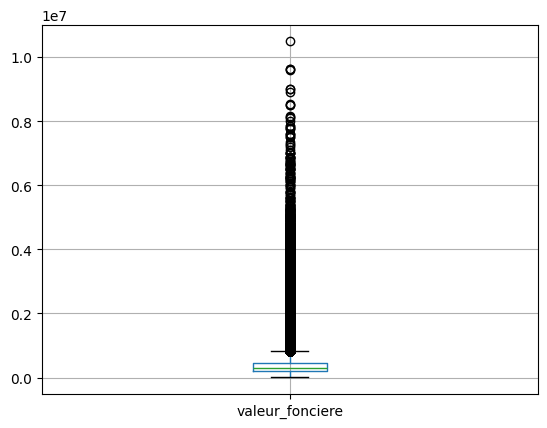

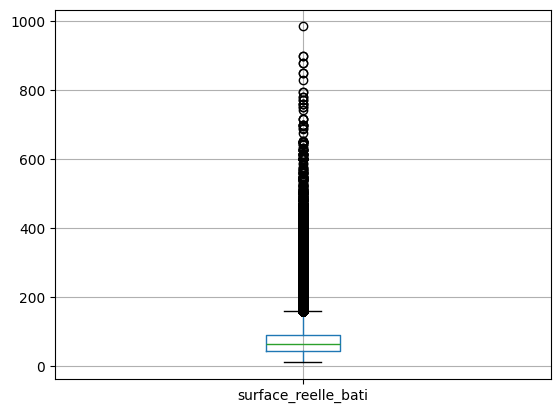

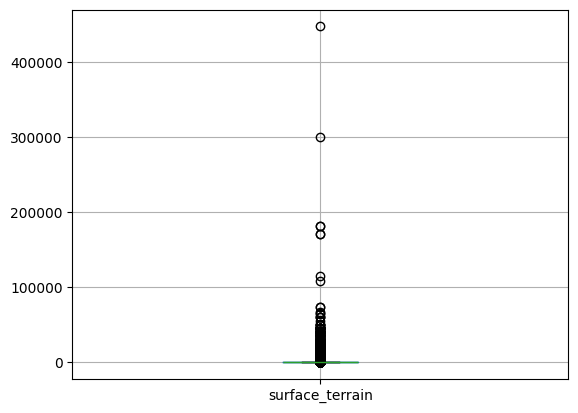

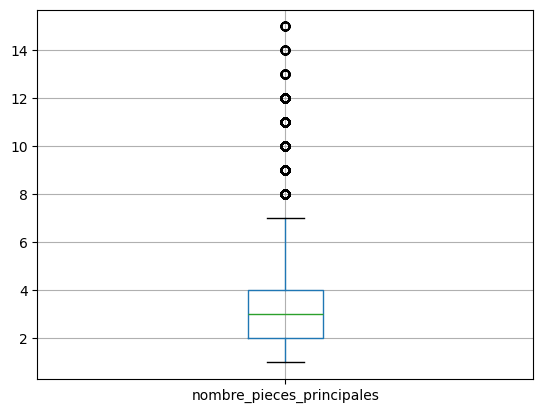

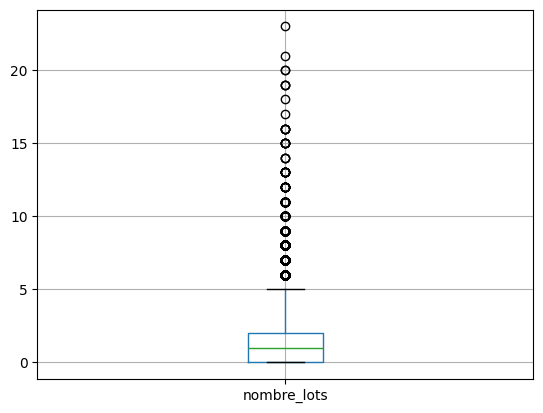

In [29]:
colums_num = ['valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales', 'nombre_lots']
for i in colums_num:
    df.boxplot(column=i)
    plt.show()


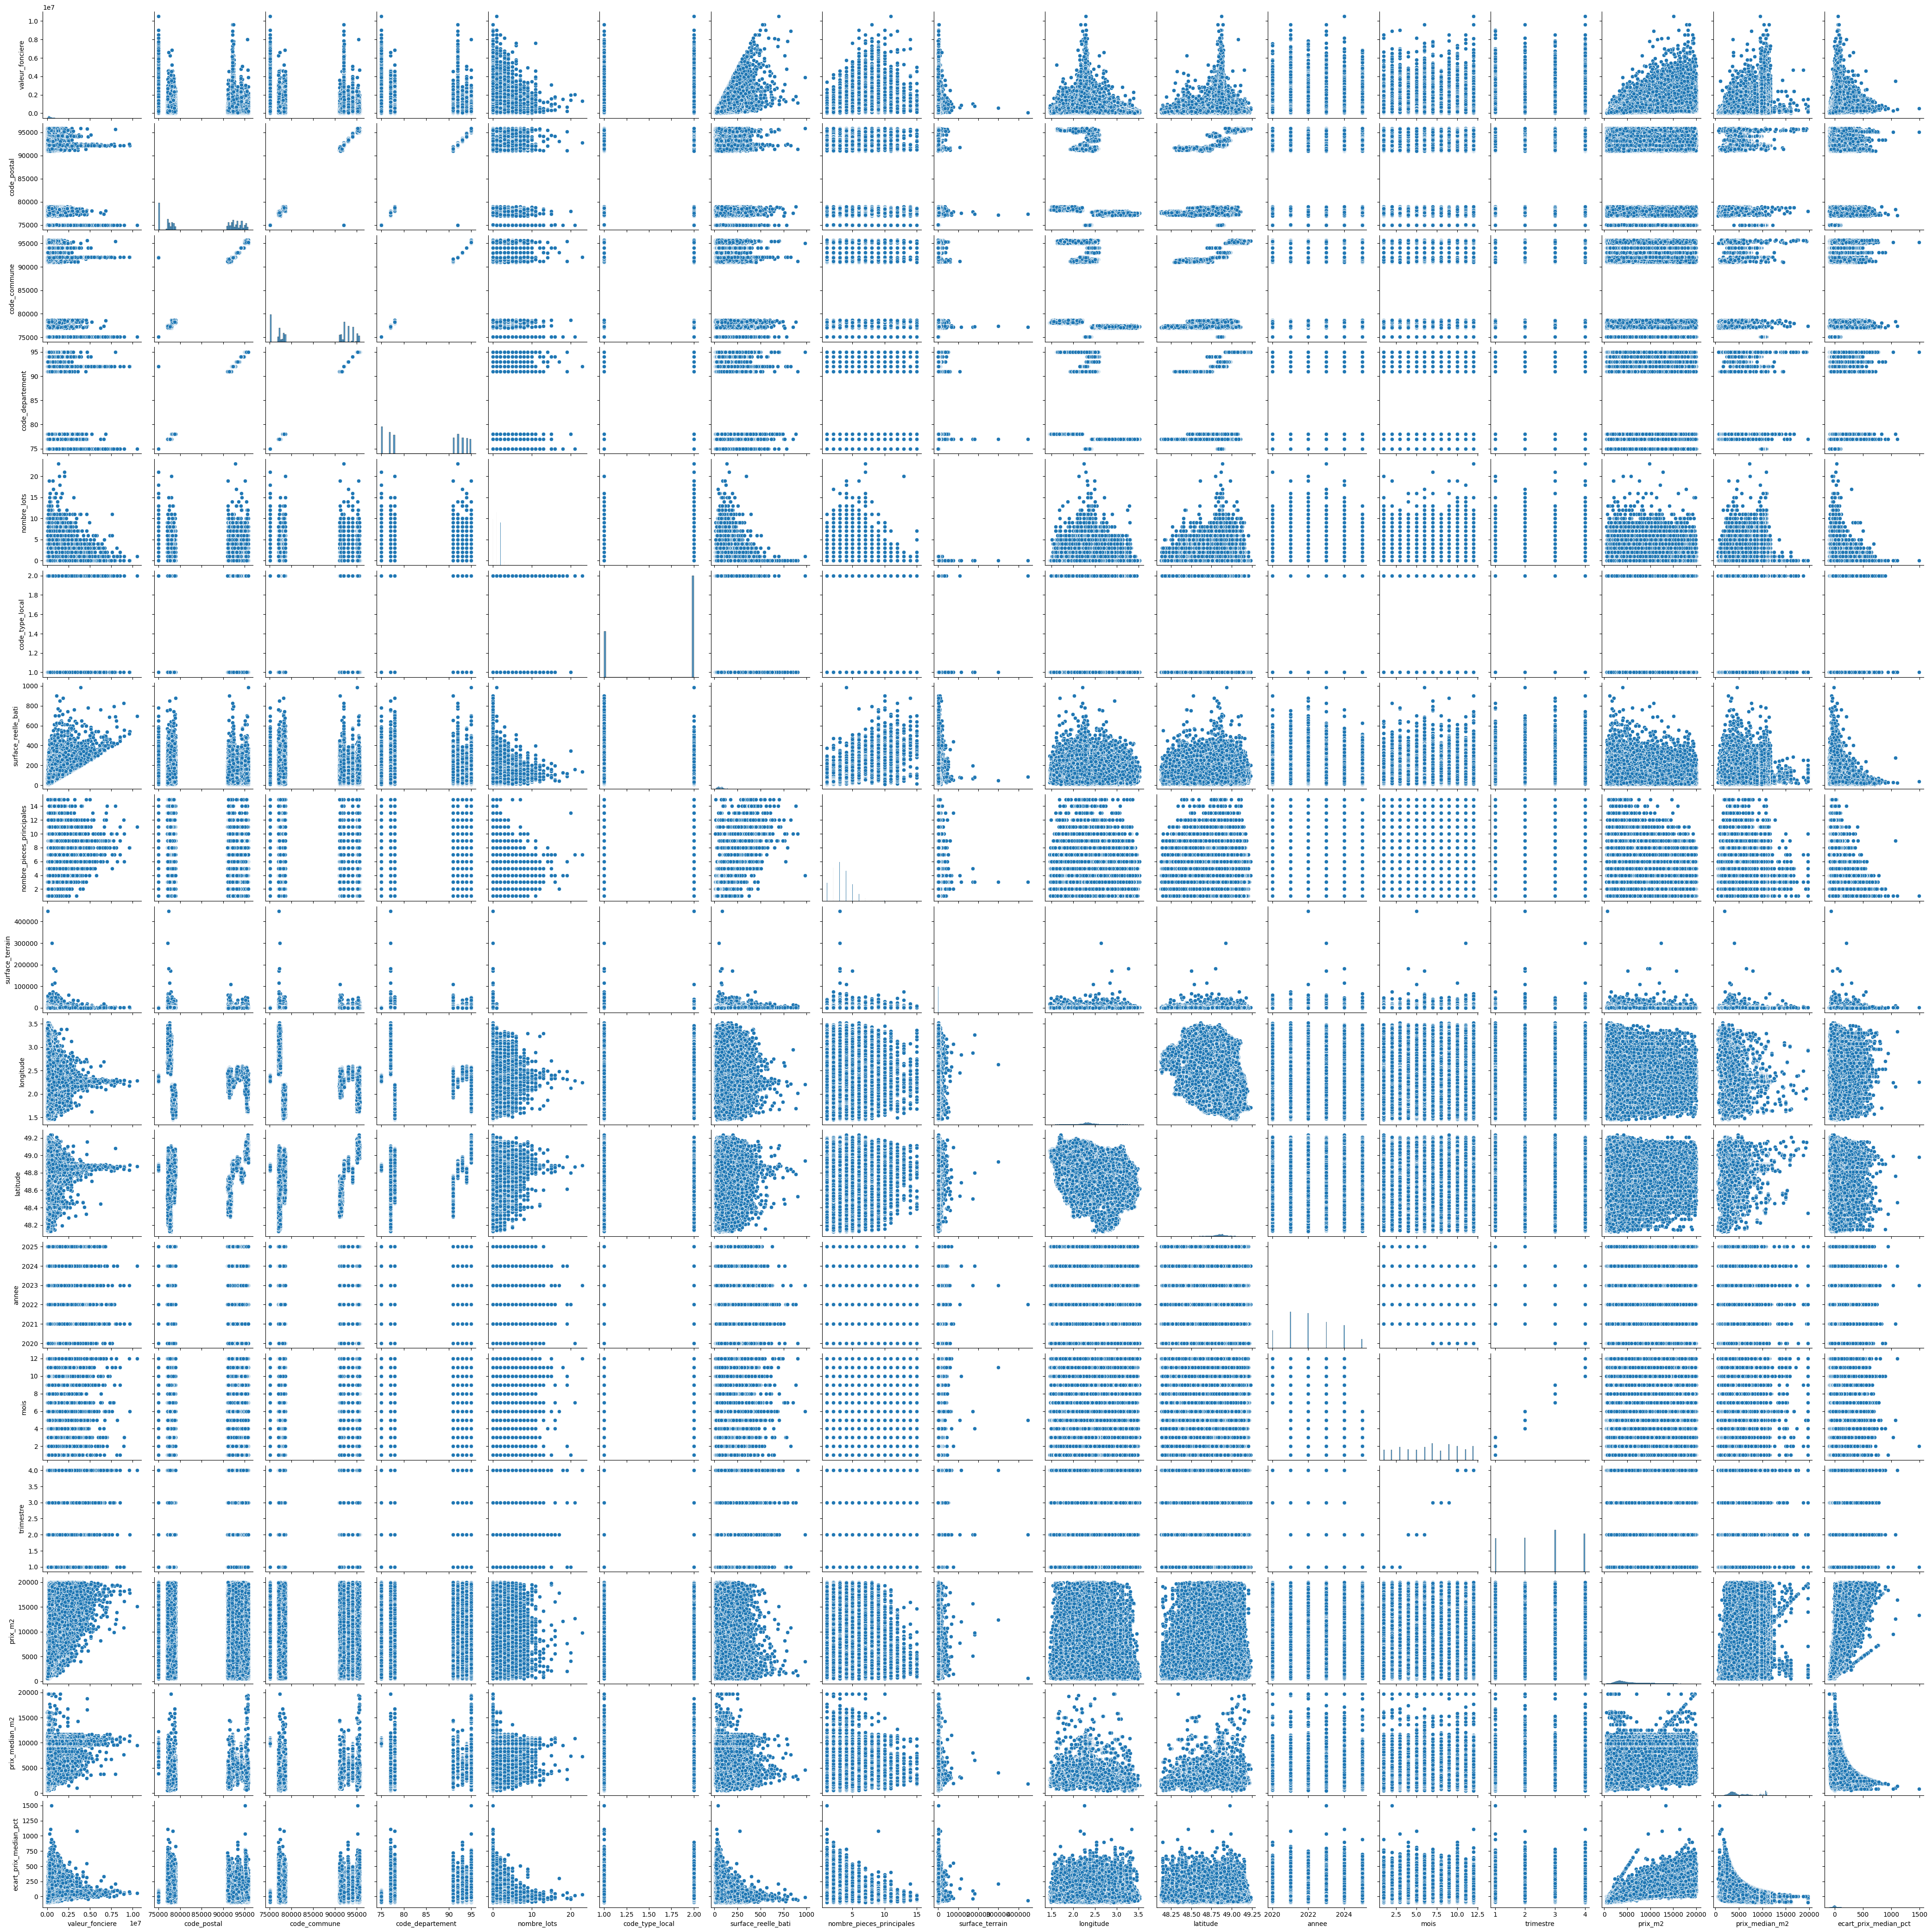

In [31]:
sns.pairplot(df)
plt.show()

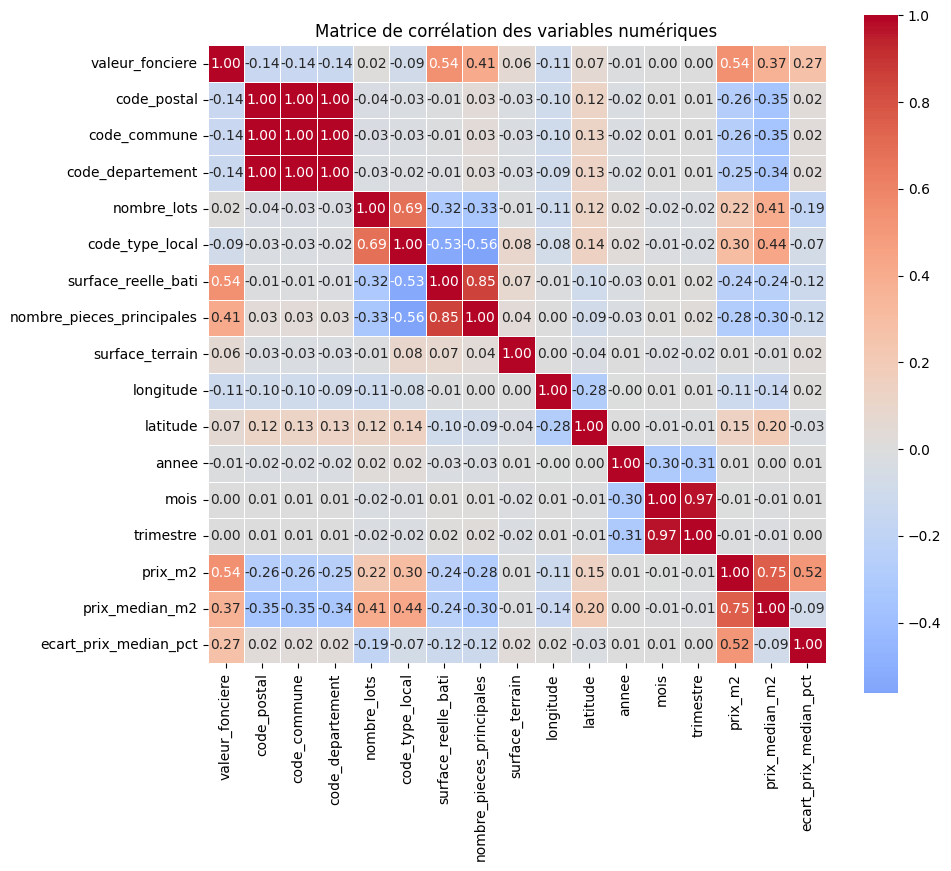

In [39]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.show()

## Train Test Split

ANALYSE PRÉLIMINAIRE

Nombre total d'observations : 815,674

Statistiques de la variable cible (prix_m2):
count    815674.000000
mean       5933.265559
std        3585.357897
min         500.240000
25%        3281.250000
50%        4737.373737
75%        7985.274468
max       19998.888889
Name: prix_m2, dtype: float64

Bornes pour valeurs aberrantes (méthode IQR × 3):
  - Borne inférieure : -10830.82 €/m²
  - Borne supérieure : 22097.35 €/m²
  - Nombre de valeurs aberrantes : 0 (0.00%)

VALEURS MANQUANTES
         Colonne  Manquants  Pourcentage
 surface_terrain     562227    68.927905
       longitude      11751     1.440649
        latitude      11751     1.440649
     code_postal          8     0.000981
adresse_nom_voie          3     0.000368

IDENTIFICATION DES VARIABLES

Variables numériques (14) :
  code_postal, code_commune, code_departement, nombre_lots, code_type_local, surface_reelle_bati, nombre_pieces_principales, surface_terrain, longitude, latitude, annee, mois, trimestr

/var/folders/b3/k29r132d0bzbxz79ssnwqzrr0000gn/T/ipykernel_1966/152817805.py:167: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data_to_plot, labels=['Train', 'Validation', 'Test'])


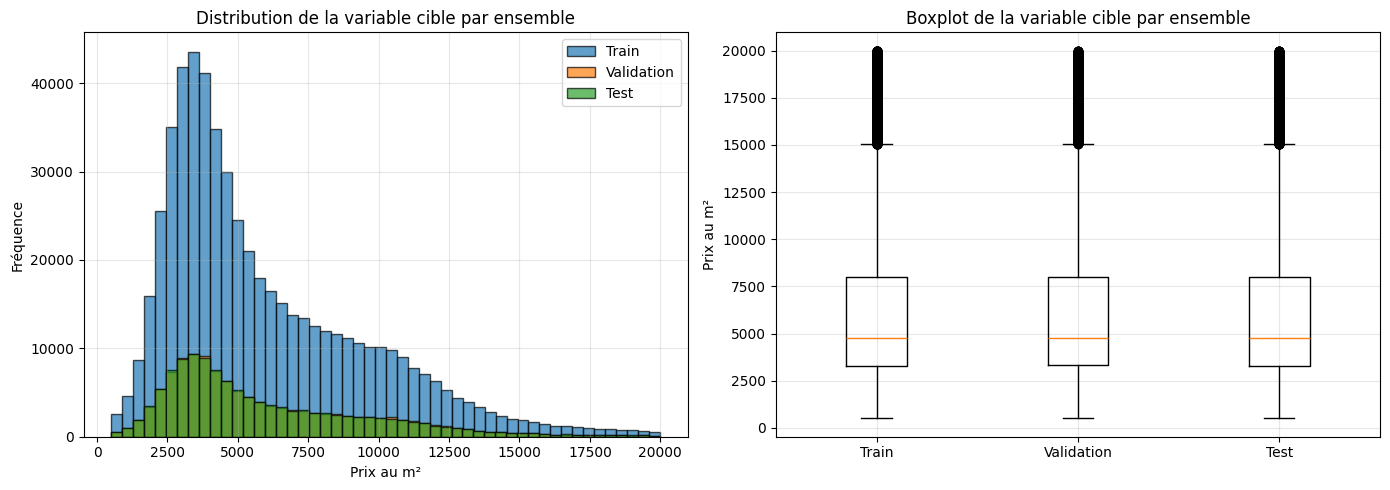


💾 Variables créées et prêtes pour l'étape suivante :
   - X_train, X_val, X_test
   - y_train, y_val, y_test
   - numeric_vars, categorical_vars


In [41]:
"""
ÉTAPE 1 : PRÉPARATION DES DONNÉES ET DÉCOUPAGE TRAIN/TEST
=========================================================
Objectif : Prédire le prix_m2 des biens immobiliers en Île-de-France
"""

print("=" * 80)
print("ANALYSE PRÉLIMINAIRE")
print("=" * 80)

# 1. Vue d'ensemble des données
print(f"\nNombre total d'observations : {len(df):,}")
print(f"\nStatistiques de la variable cible (prix_m2):")
print(df['prix_m2'].describe())

# 2. Détection des valeurs aberrantes sur la cible
Q1 = df['prix_m2'].quantile(0.25)
Q3 = df['prix_m2'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

print(f"\nBornes pour valeurs aberrantes (méthode IQR × 3):")
print(f"  - Borne inférieure : {lower_bound:.2f} €/m²")
print(f"  - Borne supérieure : {upper_bound:.2f} €/m²")

outliers = df[(df['prix_m2'] < lower_bound) | (df['prix_m2'] > upper_bound)]
print(f"  - Nombre de valeurs aberrantes : {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")

# 3. Gestion des valeurs manquantes
print("\n" + "=" * 80)
print("VALEURS MANQUANTES")
print("=" * 80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Manquants': missing.values,
    'Pourcentage': missing_pct.values
}).query('Manquants > 0').sort_values('Manquants', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("Aucune valeur manquante !")

# 4. Identification des variables
print("\n" + "=" * 80)
print("IDENTIFICATION DES VARIABLES")
print("=" * 80)

# Variables à exclure de la modélisation
vars_to_exclude = ['date_mutation', 'valeur_fonciere', 'adresse_nom_voie',
                   'nom_commune', 'prix_m2', 'ecart_prix_median_pct']

# Variables numériques
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_vars = [v for v in numeric_vars if v not in vars_to_exclude]

# Variables catégorielles
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
categorical_vars = [v for v in categorical_vars if v not in vars_to_exclude]

print(f"\nVariables numériques ({len(numeric_vars)}) :")
print(f"  {', '.join(numeric_vars)}")

print(f"\nVariables catégorielles ({len(categorical_vars)}) :")
print(f"  {', '.join(categorical_vars)}")

# 5. Analyse des corrélations (déjà fournie dans votre image)
print("\n" + "=" * 80)
print("CORRÉLATIONS AVEC LA CIBLE (prix_m2)")
print("=" * 80)

correlations = df[numeric_vars + ['prix_m2']].corr()['prix_m2'].drop('prix_m2').sort_values(ascending=False)
print(correlations)

print("\nObservations importantes :")
print("  ✓ prix_median_m2 (0.75) : forte corrélation positive → variable importante")
print("  ✓ ecart_prix_median_pct (0.52) : corrélation modérée (déjà dérivée)")
print("  ✓ nombre_pieces_principales (-0.30) : légère corrélation négative")
print("  ✓ code_postal/commune/dept : multicolinéarité parfaite → garder un seul")

# 6. Préparation des features finales
print("\n" + "=" * 80)
print("PRÉPARATION DES FEATURES")
print("=" * 80)

# Créer le dataframe de travail
df_model = df.copy()

# Option 1 : Exclure les outliers extrêmes (recommandé pour débuter)
print("\nOption choisie : Exclusion des outliers extrêmes")
df_model = df_model[(df_model['prix_m2'] >= lower_bound) &
                    (df_model['prix_m2'] <= upper_bound)]
print(f"Données restantes : {len(df_model):,} observations")

# Gérer les valeurs manquantes
# surface_terrain : remplir par 0 (appartements sans terrain)
if 'surface_terrain' in df_model.columns:
    df_model['surface_terrain'] = df_model['surface_terrain'].fillna(0)

# longitude/latitude : interpolation ou suppression (peu de valeurs manquantes)
df_model = df_model.dropna(subset=['longitude', 'latitude'])

print(f"Après nettoyage : {len(df_model):,} observations")

# 7. DÉCOUPAGE TRAIN/TEST
print("\n" + "=" * 80)
print("DÉCOUPAGE TRAIN/TEST/VALIDATION")
print("=" * 80)

# Séparer features et target
X = df_model.drop(vars_to_exclude, axis=1)
y = df_model['prix_m2']

# Stratégie : 70% train, 15% validation, 15% test
# On fait d'abord 70/30, puis on split les 30% en deux
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, shuffle=True
)

print(f"\nTaille des ensembles :")
print(f"  - Train      : {len(X_train):>7,} observations ({len(X_train)/len(df_model)*100:.1f}%)")
print(f"  - Validation : {len(X_val):>7,} observations ({len(X_val)/len(df_model)*100:.1f}%)")
print(f"  - Test       : {len(X_test):>7,} observations ({len(X_test)/len(df_model)*100:.1f}%)")

print(f"\nDistribution de la cible :")
print(f"  Train      : moyenne = {y_train.mean():.2f} €/m², std = {y_train.std():.2f}")
print(f"  Validation : moyenne = {y_val.mean():.2f} €/m², std = {y_val.std():.2f}")
print(f"  Test       : moyenne = {y_test.mean():.2f} €/m², std = {y_test.std():.2f}")

# 8. Sauvegarde des indices pour reproductibilité
train_indices = X_train.index
val_indices = X_val.index
test_indices = X_test.index

print("\n" + "=" * 80)
print("✓ ÉTAPE 1 TERMINÉE")
print("=" * 80)
print("\nProchaines étapes :")
print("  → ÉTAPE 2 : Feature engineering et encodage")
print("  → ÉTAPE 3 : Modèle de référence (MCO)")
print("  → ÉTAPE 4 : Modèles avancés (Random Forest, XGBoost)")
print("  → ÉTAPE 5 : Deep Learning (PyTorch)")
print("  → ÉTAPE 6 : Interprétabilité (SHAP)")

# Visualisation rapide
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution de la cible
axes[0].hist(y_train, bins=50, alpha=0.7, label='Train', edgecolor='black')
axes[0].hist(y_val, bins=50, alpha=0.7, label='Validation', edgecolor='black')
axes[0].hist(y_test, bins=50, alpha=0.7, label='Test', edgecolor='black')
axes[0].set_xlabel('Prix au m²')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution de la variable cible par ensemble')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
data_to_plot = [y_train, y_val, y_test]
axes[1].boxplot(data_to_plot, labels=['Train', 'Validation', 'Test'])
axes[1].set_ylabel('Prix au m²')
axes[1].set_title('Boxplot de la variable cible par ensemble')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💾 Variables créées et prêtes pour l'étape suivante :")
print("   - X_train, X_val, X_test")
print("   - y_train, y_val, y_test")
print("   - numeric_vars, categorical_vars")

## FE & encodage des var

In [43]:
"""
ÉTAPE 2 : FEATURE ENGINEERING ET ENCODAGE DES VARIABLES
========================================================
Objectif : Créer des features pertinentes et encoder les variables catégorielles
"""

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce  # pip install category-encoders si nécessaire

print("=" * 80)
print("ÉTAPE 2 : FEATURE ENGINEERING")
print("=" * 80)

# ============================================================================
# 1. CRÉATION DE NOUVELLES FEATURES
# ============================================================================

def create_features(df):
    """
    Crée des features dérivées pertinentes pour la prédiction du prix au m²
    """
    df_feat = df.copy()

    # --- Features immobilières ---

    # Ratio surface/pièces (taille moyenne des pièces)
    df_feat['surface_par_piece'] = (
        df_feat['surface_reelle_bati'] / df_feat['nombre_pieces_principales']
    ).replace([np.inf, -np.inf], 0).fillna(0)

    # Indicateur "avec terrain"
    df_feat['a_terrain'] = (df_feat['surface_terrain'] > 0).astype(int)

    # Ratio terrain/bâti (pour maisons)
    df_feat['ratio_terrain_bati'] = (
        df_feat['surface_terrain'] / df_feat['surface_reelle_bati']
    ).replace([np.inf, -np.inf], 0).fillna(0)

    # Log des surfaces (relations non-linéaires)
    df_feat['log_surface_bati'] = np.log1p(df_feat['surface_reelle_bati'])
    df_feat['log_surface_terrain'] = np.log1p(df_feat['surface_terrain'])

    # Densité (nombre de lots peut indiquer copropriété)
    df_feat['densite_lots'] = np.log1p(df_feat['nombre_lots'])

    # --- Features temporelles ---

    # Cyclicité des mois (sin/cos pour capturer la saisonnalité)
    df_feat['mois_sin'] = np.sin(2 * np.pi * df_feat['mois'] / 12)
    df_feat['mois_cos'] = np.cos(2 * np.pi * df_feat['mois'] / 12)

    # Années depuis le début (tendance temporelle)
    df_feat['annees_depuis_debut'] = df_feat['annee'] - df_feat['annee'].min()

    # --- Features géographiques ---

    # Distance au centre (approximatif : Paris = 48.8566, 2.3522)
    paris_lat, paris_lon = 48.8566, 2.3522
    df_feat['distance_paris'] = np.sqrt(
        (df_feat['latitude'] - paris_lat)**2 +
        (df_feat['longitude'] - paris_lon)**2
    )

    # Quadrant géographique (Nord/Sud/Est/Ouest de Paris)
    df_feat['nord_paris'] = (df_feat['latitude'] > paris_lat).astype(int)
    df_feat['est_paris'] = (df_feat['longitude'] > paris_lon).astype(int)

    # --- Interactions ---

    # Prix médian × distance (l'effet du quartier peut varier avec la distance)
    df_feat['prix_median_x_distance'] = (
        df_feat['prix_median_m2'] * df_feat['distance_paris']
    )

    # Surface × type de bien (déjà encodé dans code_type_local)
    df_feat['surface_x_type'] = (
        df_feat['surface_reelle_bati'] * df_feat['code_type_local']
    )

    return df_feat

print("\n1️⃣  Création des features dérivées...")
X_train_feat = create_features(X_train)
X_val_feat = create_features(X_val)
X_test_feat = create_features(X_test)

print(f"   ✓ Nouvelles features créées : {len(X_train_feat.columns) - len(X_train.columns)}")
print(f"   ✓ Total features : {len(X_train_feat.columns)}")

# ============================================================================
# 2. GESTION DES VARIABLES CATÉGORIELLES
# ============================================================================

print("\n" + "=" * 80)
print("ENCODAGE DES VARIABLES CATÉGORIELLES")
print("=" * 80)

# Identifier les variables catégorielles restantes
cat_vars = X_train_feat.select_dtypes(include=['object']).columns.tolist()
print(f"\nVariables catégorielles à encoder : {cat_vars}")

# Analyser la cardinalité
print("\n2️⃣  Analyse de la cardinalité :")
for col in cat_vars:
    n_unique = X_train_feat[col].nunique()
    print(f"   - {col:25s} : {n_unique:>6,} valeurs uniques")

# Stratégie d'encodage :
# - Faible cardinalité (<10) : One-Hot Encoding
# - Cardinalité moyenne (10-50) : Label Encoding ou Target Encoding
# - Haute cardinalité (>50) : Target Encoding (moyenne du prix par catégorie)

# --- Stratégie d'encodage optimale ---

# Pour nature_mutation et type_local : One-Hot (peu de valeurs)
low_cardinality = ['nature_mutation', 'type_local']

# Pour quartier et quartier_detaille : Target Encoding (beaucoup de valeurs)
high_cardinality = ['quartier', 'quartier_detaille']

print("\n3️⃣  Stratégie d'encodage :")
print(f"   - One-Hot Encoding : {low_cardinality}")
print(f"   - Target Encoding  : {high_cardinality}")

# ============================================================================
# 3. APPLICATION DES ENCODAGES
# ============================================================================

# --- One-Hot Encoding ---
print("\n4️⃣  Application du One-Hot Encoding...")

if low_cardinality:
    ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

    # Fit sur train uniquement
    ohe.fit(X_train_feat[low_cardinality])

    # Transform sur tous les sets
    train_ohe = ohe.transform(X_train_feat[low_cardinality])
    val_ohe = ohe.transform(X_val_feat[low_cardinality])
    test_ohe = ohe.transform(X_test_feat[low_cardinality])

    # Noms des colonnes
    ohe_cols = ohe.get_feature_names_out(low_cardinality)

    # Créer DataFrames
    train_ohe_df = pd.DataFrame(train_ohe, columns=ohe_cols, index=X_train_feat.index)
    val_ohe_df = pd.DataFrame(val_ohe, columns=ohe_cols, index=X_val_feat.index)
    test_ohe_df = pd.DataFrame(test_ohe, columns=ohe_cols, index=X_test_feat.index)

    print(f"   ✓ {len(ohe_cols)} colonnes créées")

# --- Target Encoding ---
print("\n5️⃣  Application du Target Encoding...")

if high_cardinality:
    # Target Encoder avec régularisation (smoothing) pour éviter l'overfitting
    target_encoder = ce.TargetEncoder(
        cols=high_cardinality,
        smoothing=10,  # Régularisation
        min_samples_leaf=20  # Minimum d'échantillons pour calculer la moyenne
    )

    # Fit sur train avec la target
    target_encoder.fit(X_train_feat[high_cardinality], y_train)

    # Transform
    train_target = target_encoder.transform(X_train_feat[high_cardinality])
    val_target = target_encoder.transform(X_val_feat[high_cardinality])
    test_target = target_encoder.transform(X_test_feat[high_cardinality])

    # Renommer les colonnes
    train_target.columns = [f'{col}_encoded' for col in high_cardinality]
    val_target.columns = [f'{col}_encoded' for col in high_cardinality]
    test_target.columns = [f'{col}_encoded' for col in high_cardinality]

    print(f"   ✓ {len(high_cardinality)} variables encodées avec Target Encoding")

# ============================================================================
# 4. ASSEMBLAGE FINAL
# ============================================================================

print("\n" + "=" * 80)
print("ASSEMBLAGE DES FEATURES")
print("=" * 80)

# Supprimer les colonnes catégorielles originales
X_train_num = X_train_feat.drop(columns=cat_vars)
X_val_num = X_val_feat.drop(columns=cat_vars)
X_test_num = X_test_feat.drop(columns=cat_vars)

# Résoudre la multicolinéarité : garder seulement code_commune
# (plus granulaire que code_postal et code_departement)
cols_to_drop = ['code_postal', 'code_departement']
X_train_num = X_train_num.drop(columns=cols_to_drop, errors='ignore')
X_val_num = X_val_num.drop(columns=cols_to_drop, errors='ignore')
X_test_num = X_test_num.drop(columns=cols_to_drop, errors='ignore')

# Concatener tout
X_train_final = pd.concat([X_train_num, train_ohe_df, train_target], axis=1)
X_val_final = pd.concat([X_val_num, val_ohe_df, val_target], axis=1)
X_test_final = pd.concat([X_test_num, test_ohe_df, test_target], axis=1)

print(f"\n6️⃣  Dimensions finales :")
print(f"   - Train      : {X_train_final.shape}")
print(f"   - Validation : {X_val_final.shape}")
print(f"   - Test       : {X_test_final.shape}")

# ============================================================================
# 5. STANDARDISATION (Important pour MCO et Deep Learning)
# ============================================================================

print("\n" + "=" * 80)
print("STANDARDISATION DES FEATURES")
print("=" * 80)

print("\n7️⃣  Application de la standardisation...")

# Identifier les colonnes à standardiser (toutes sauf binaires)
binary_cols = [col for col in X_train_final.columns if X_train_final[col].nunique() <= 2]
cols_to_scale = [col for col in X_train_final.columns if col not in binary_cols]

print(f"   - Colonnes binaires (non standardisées) : {len(binary_cols)}")
print(f"   - Colonnes à standardiser : {len(cols_to_scale)}")

# Standardisation
scaler = StandardScaler()
scaler.fit(X_train_final[cols_to_scale])

# Créer copies pour la version standardisée
X_train_scaled = X_train_final.copy()
X_val_scaled = X_val_final.copy()
X_test_scaled = X_test_final.copy()

# Appliquer la standardisation
X_train_scaled[cols_to_scale] = scaler.transform(X_train_final[cols_to_scale])
X_val_scaled[cols_to_scale] = scaler.transform(X_val_final[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test_final[cols_to_scale])

print("   ✓ Standardisation appliquée (moyenne=0, std=1)")

# ============================================================================
# 6. RÉSUMÉ ET SAUVEGARDE
# ============================================================================

print("\n" + "=" * 80)
print("✓ ÉTAPE 2 TERMINÉE")
print("=" * 80)

print("\n📊 Résumé des transformations :")
print(f"   • Features initiales        : {X_train.shape[1]}")
print(f"   • Features créées           : {len(X_train_feat.columns) - len(X_train.columns)}")
print(f"   • One-Hot Encoding          : {len(ohe_cols)} colonnes")
print(f"   • Target Encoding           : {len(high_cardinality)} variables")
print(f"   • Colonnes supprimées       : code_postal, code_departement")
print(f"   • 📦 Total features finales : {X_train_final.shape[1]}")

print("\n🎯 Nouvelles features créées :")
new_features = [col for col in X_train_final.columns if col not in X_train.columns]
for feat in sorted(new_features)[:15]:  # Afficher les 15 premières
    print(f"   • {feat}")
if len(new_features) > 15:
    print(f"   ... et {len(new_features) - 15} autres")

print("\n💾 Variables disponibles pour la modélisation :")
print("   Version NON standardisée (pour arbres) :")
print("   → X_train_final, X_val_final, X_test_final")
print("\n   Version STANDARDISÉE (pour MCO et Deep Learning) :")
print("   → X_train_scaled, X_val_scaled, X_test_scaled")
print("\n   Targets (inchangées) :")
print("   → y_train, y_val, y_test")

print("\n📌 Objets à conserver pour la production :")
print("   → ohe (OneHotEncoder)")
print("   → target_encoder (TargetEncoder)")
print("   → scaler (StandardScaler)")

print("\n" + "=" * 80)
print("Prochaine étape : ÉTAPE 3 - Modèle de référence (MCO)")
print("=" * 80)

# Vérification rapide - pas de valeurs manquantes
print("\n🔍 Vérification finale :")
print(f"   Valeurs manquantes dans X_train_scaled : {X_train_scaled.isnull().sum().sum()}")
print(f"   Valeurs infinies dans X_train_scaled   : {np.isinf(X_train_scaled).sum().sum()}")

# Afficher quelques statistiques
print(f"\n📈 Statistiques des features (échantillon) :")
sample_cols = X_train_scaled.columns[:5]
print(X_train_scaled[sample_cols].describe().round(2))

ÉTAPE 2 : FEATURE ENGINEERING

1️⃣  Création des features dérivées...
   ✓ Nouvelles features créées : 14
   ✓ Total features : 32

ENCODAGE DES VARIABLES CATÉGORIELLES

Variables catégorielles à encoder : ['nature_mutation', 'type_local', 'quartier', 'quartier_detaille']

2️⃣  Analyse de la cardinalité :
   - nature_mutation           :      6 valeurs uniques
   - type_local                :      2 valeurs uniques
   - quartier                  :  1,304 valeurs uniques
   - quartier_detaille         :  1,285 valeurs uniques

3️⃣  Stratégie d'encodage :
   - One-Hot Encoding : ['nature_mutation', 'type_local']
   - Target Encoding  : ['quartier', 'quartier_detaille']

4️⃣  Application du One-Hot Encoding...
   ✓ 6 colonnes créées

5️⃣  Application du Target Encoding...
   ✓ 2 variables encodées avec Target Encoding

ASSEMBLAGE DES FEATURES

6️⃣  Dimensions finales :
   - Train      : (562746, 34)
   - Validation : (120588, 34)
   - Test       : (120589, 34)

STANDARDISATION DES FEATURE

## MCO Basique

ÉTAPE 3 : MODÈLE DE RÉGRESSION LINÉAIRE (MCO)

1️⃣  Entraînement du modèle MCO...
   ✓ Modèle entraîné
   • Nombre de features : 34
   • Nombre d'observations : 562,746

2️⃣  Génération des prédictions...
   ✓ Prédictions générées pour train, validation et test

ÉVALUATION DES PERFORMANCES

3️⃣  Métriques de performance :

   Dataset        RMSE         MAE       R²  MAPE (%)
     Train 2143.278157 1337.238243 0.643249 30.059734
Validation 2138.104223 1333.671986 0.643192 29.811361
      Test 2151.285998 1341.385686 0.639978 30.359570

📊 Interprétation :
   • R² Test = 0.6400
     → Le modèle explique 64.00% de la variance
   • RMSE Test = 2151.29 €/m²
     → Erreur moyenne de ±2151 €/m²
   • MAE Test = 1341.39 €/m²
     → Erreur absolue moyenne de 1341 €/m²
   • MAPE Test = 30.36%
     → Erreur relative moyenne de 30.4%

🔍 Analyse du surapprentissage :
   • Différence R² (Train - Val) : 0.0001
   ✓ Pas de surapprentissage détecté

ANALYSE DES COEFFICIENTS (INTERPRÉTABILITÉ)

4️⃣  Top 

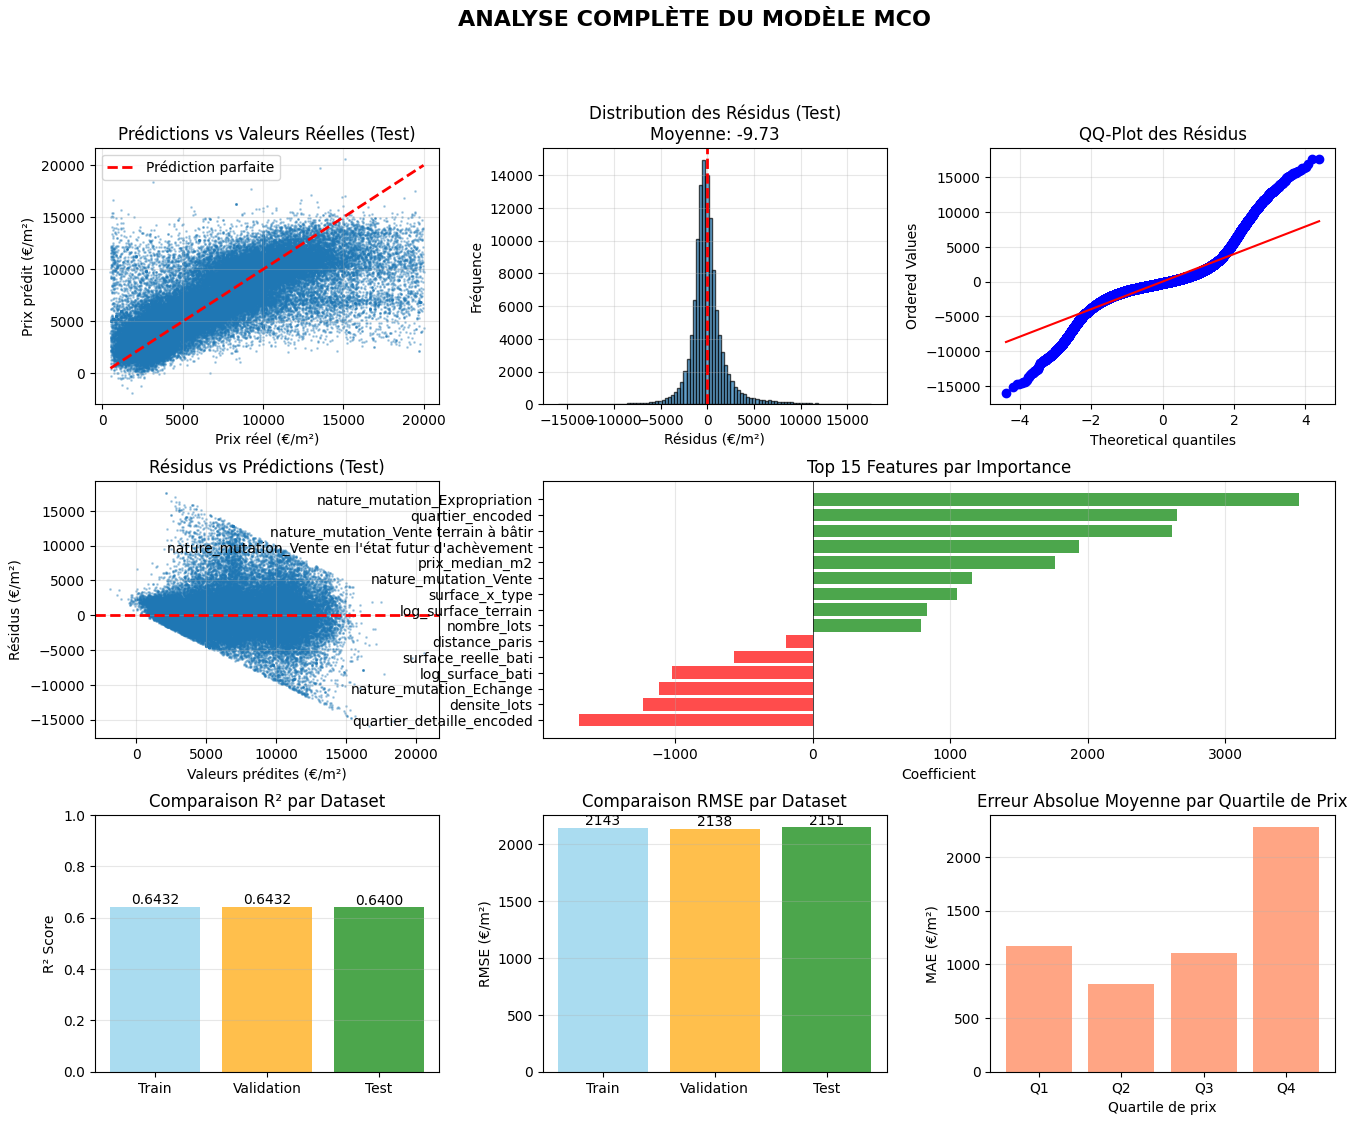


BONUS : COMPARAISON AVEC RÉGULARISATION

5️⃣  Entraînement des modèles régularisés...

📊 Comparaison des modèles linéaires :

    Modèle  R² Validation  RMSE Validation
       MCO       0.643192      2138.104223
Ridge (L2)       0.643193      2138.102576
Lasso (L1)       0.642904      2138.967130

✓ ÉTAPE 3 TERMINÉE - RÉSUMÉ

📈 PERFORMANCES DU MODÈLE MCO :
   • R² Test             : 0.6400
   • RMSE Test           : 2151.29 €/m²
   • MAE Test            : 1341.39 €/m²
   • MAPE Test           : 30.36%

🎯 FORCES DU MODÈLE :
   ✓ Simple et interprétable
   ✓ Coefficients directement analysables
   ✓ Pas de surapprentissage
   ✓ Baseline solide établie

⚠️  LIMITES DU MODÈLE :
   ✗ Hypothèse de linéarité stricte
   ✗ Ne capture pas les interactions complexes
   ✗ Sensible aux outliers
   ✗ Performances limitées pour relations non-linéaires

💡 INSIGHTS CLÉS :
   • La feature 'nature_mutation_Expropriation' a le plus d'impact
   • Les résidus semblent bien distribués
   • Le modèle sur-est

In [44]:
"""
ÉTAPE 3 : MODÈLE DE RÉFÉRENCE - RÉGRESSION LINÉAIRE (MCO)
==========================================================
Objectif : Établir une baseline avec un modèle simple et interprétable
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("ÉTAPE 3 : MODÈLE DE RÉGRESSION LINÉAIRE (MCO)")
print("=" * 80)

# ============================================================================
# 1. ENTRAÎNEMENT DU MODÈLE MCO
# ============================================================================

print("\n1️⃣  Entraînement du modèle MCO...")

# On utilise la version STANDARDISÉE pour MCO
model_ols = LinearRegression()
model_ols.fit(X_train_scaled, y_train)

print("   ✓ Modèle entraîné")
print(f"   • Nombre de features : {X_train_scaled.shape[1]}")
print(f"   • Nombre d'observations : {X_train_scaled.shape[0]:,}")

# ============================================================================
# 2. PRÉDICTIONS
# ============================================================================

print("\n2️⃣  Génération des prédictions...")

y_train_pred = model_ols.predict(X_train_scaled)
y_val_pred = model_ols.predict(X_val_scaled)
y_test_pred = model_ols.predict(X_test_scaled)

print("   ✓ Prédictions générées pour train, validation et test")

# ============================================================================
# 3. ÉVALUATION DES PERFORMANCES
# ============================================================================

print("\n" + "=" * 80)
print("ÉVALUATION DES PERFORMANCES")
print("=" * 80)

def evaluate_model(y_true, y_pred, dataset_name):
    """Calcule les métriques de performance"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        'Dataset': dataset_name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE (%)': mape
    }

# Calcul des métriques
results = []
results.append(evaluate_model(y_train, y_train_pred, 'Train'))
results.append(evaluate_model(y_val, y_val_pred, 'Validation'))
results.append(evaluate_model(y_test, y_test_pred, 'Test'))

results_df = pd.DataFrame(results)

print("\n3️⃣  Métriques de performance :\n")
print(results_df.to_string(index=False))

# Interprétation
print("\n📊 Interprétation :")
print(f"   • R² Test = {results_df.loc[2, 'R²']:.4f}")
print(f"     → Le modèle explique {results_df.loc[2, 'R²']*100:.2f}% de la variance")
print(f"   • RMSE Test = {results_df.loc[2, 'RMSE']:.2f} €/m²")
print(f"     → Erreur moyenne de ±{results_df.loc[2, 'RMSE']:.0f} €/m²")
print(f"   • MAE Test = {results_df.loc[2, 'MAE']:.2f} €/m²")
print(f"     → Erreur absolue moyenne de {results_df.loc[2, 'MAE']:.0f} €/m²")
print(f"   • MAPE Test = {results_df.loc[2, 'MAPE (%)']:.2f}%")
print(f"     → Erreur relative moyenne de {results_df.loc[2, 'MAPE (%)']:.1f}%")

# Check overfitting
train_r2 = results_df.loc[0, 'R²']
val_r2 = results_df.loc[1, 'R²']
diff_r2 = train_r2 - val_r2

print(f"\n🔍 Analyse du surapprentissage :")
print(f"   • Différence R² (Train - Val) : {diff_r2:.4f}")
if diff_r2 < 0.05:
    print("   ✓ Pas de surapprentissage détecté")
elif diff_r2 < 0.10:
    print("   ⚠️  Léger surapprentissage")
else:
    print("   ❌ Surapprentissage important")

# ============================================================================
# 4. ANALYSE DES COEFFICIENTS (INTERPRÉTABILITÉ)
# ============================================================================

print("\n" + "=" * 80)
print("ANALYSE DES COEFFICIENTS (INTERPRÉTABILITÉ)")
print("=" * 80)

print("\n4️⃣  Top 15 features les plus importantes (par coefficient absolu) :\n")

# Créer un DataFrame avec les coefficients
coefficients = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': model_ols.coef_,
    'Abs_Coefficient': np.abs(model_ols.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(coefficients.head(15).to_string(index=False))

print(f"\n📌 Intercept (constante) : {model_ols.intercept_:.2f} €/m²")

print("\n💡 Interprétation des principaux coefficients :")
top_features = coefficients.head(5)
for idx, row in top_features.iterrows():
    feat = row['Feature']
    coef = row['Coefficient']
    direction = "augmente" if coef > 0 else "diminue"
    print(f"   • {feat:30s} : {direction:8s} le prix de {abs(coef):.2f} €/m² (par unité de std)")

# ============================================================================
# 5. VISUALISATIONS
# ============================================================================

print("\n" + "=" * 80)
print("VISUALISATIONS")
print("=" * 80)

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# --- Plot 1 : Valeurs prédites vs réelles (Test) ---
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(y_test, y_test_pred, alpha=0.3, s=1)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Prédiction parfaite')
ax1.set_xlabel('Prix réel (€/m²)')
ax1.set_ylabel('Prix prédit (€/m²)')
ax1.set_title('Prédictions vs Valeurs Réelles (Test)')
ax1.legend()
ax1.grid(alpha=0.3)

# --- Plot 2 : Distribution des résidus (Test) ---
ax2 = fig.add_subplot(gs[0, 1])
residuals_test = y_test - y_test_pred
ax2.hist(residuals_test, bins=100, edgecolor='black', alpha=0.7)
ax2.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax2.set_xlabel('Résidus (€/m²)')
ax2.set_ylabel('Fréquence')
ax2.set_title(f'Distribution des Résidus (Test)\nMoyenne: {residuals_test.mean():.2f}')
ax2.grid(alpha=0.3)

# --- Plot 3 : QQ-plot des résidus ---
ax3 = fig.add_subplot(gs[0, 2])
from scipy import stats
stats.probplot(residuals_test, dist="norm", plot=ax3)
ax3.set_title('QQ-Plot des Résidus')
ax3.grid(alpha=0.3)

# --- Plot 4 : Résidus vs Prédictions ---
ax4 = fig.add_subplot(gs[1, 0])
ax4.scatter(y_test_pred, residuals_test, alpha=0.3, s=1)
ax4.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax4.set_xlabel('Valeurs prédites (€/m²)')
ax4.set_ylabel('Résidus (€/m²)')
ax4.set_title('Résidus vs Prédictions (Test)')
ax4.grid(alpha=0.3)

# --- Plot 5 : Top 15 coefficients ---
ax5 = fig.add_subplot(gs[1, 1:])
top_15 = coefficients.head(15).sort_values('Coefficient')
colors = ['red' if x < 0 else 'green' for x in top_15['Coefficient']]
ax5.barh(range(len(top_15)), top_15['Coefficient'], color=colors, alpha=0.7)
ax5.set_yticks(range(len(top_15)))
ax5.set_yticklabels(top_15['Feature'])
ax5.set_xlabel('Coefficient')
ax5.set_title('Top 15 Features par Importance')
ax5.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax5.grid(alpha=0.3, axis='x')

# --- Plot 6 : Comparaison Train/Val/Test (R²) ---
ax6 = fig.add_subplot(gs[2, 0])
datasets = results_df['Dataset']
r2_scores = results_df['R²']
bars = ax6.bar(datasets, r2_scores, color=['skyblue', 'orange', 'green'], alpha=0.7)
ax6.set_ylabel('R² Score')
ax6.set_title('Comparaison R² par Dataset')
ax6.set_ylim([0, 1])
ax6.grid(alpha=0.3, axis='y')
for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.4f}', ha='center', va='bottom')

# --- Plot 7 : Comparaison RMSE ---
ax7 = fig.add_subplot(gs[2, 1])
rmse_scores = results_df['RMSE']
bars = ax7.bar(datasets, rmse_scores, color=['skyblue', 'orange', 'green'], alpha=0.7)
ax7.set_ylabel('RMSE (€/m²)')
ax7.set_title('Comparaison RMSE par Dataset')
ax7.grid(alpha=0.3, axis='y')
for bar, score in zip(bars, rmse_scores):
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.0f}', ha='center', va='bottom')

# --- Plot 8 : Erreur par tranche de prix ---
ax8 = fig.add_subplot(gs[2, 2])
bins = np.percentile(y_test, [0, 25, 50, 75, 100])
y_test_binned = pd.cut(y_test, bins=bins, labels=['Q1', 'Q2', 'Q3', 'Q4'])
residuals_by_bin = pd.DataFrame({
    'bin': y_test_binned,
    'abs_residual': np.abs(residuals_test)
}).groupby('bin')['abs_residual'].mean()

ax8.bar(residuals_by_bin.index, residuals_by_bin.values, color='coral', alpha=0.7)
ax8.set_xlabel('Quartile de prix')
ax8.set_ylabel('MAE (€/m²)')
ax8.set_title('Erreur Absolue Moyenne par Quartile de Prix')
ax8.grid(alpha=0.3, axis='y')

plt.suptitle('ANALYSE COMPLÈTE DU MODÈLE MCO', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# ============================================================================
# 6. RÉGULARISATION (BONUS : Ridge et Lasso)
# ============================================================================

print("\n" + "=" * 80)
print("BONUS : COMPARAISON AVEC RÉGULARISATION")
print("=" * 80)

print("\n5️⃣  Entraînement des modèles régularisés...")

# Ridge (L2)
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_scaled, y_train)
y_val_ridge = model_ridge.predict(X_val_scaled)

# Lasso (L1)
model_lasso = Lasso(alpha=1.0, max_iter=5000)
model_lasso.fit(X_train_scaled, y_train)
y_val_lasso = model_lasso.predict(X_val_scaled)

# Comparaison
comparison = pd.DataFrame({
    'Modèle': ['MCO', 'Ridge (L2)', 'Lasso (L1)'],
    'R² Validation': [
        r2_score(y_val, y_val_pred),
        r2_score(y_val, y_val_ridge),
        r2_score(y_val, y_val_lasso)
    ],
    'RMSE Validation': [
        np.sqrt(mean_squared_error(y_val, y_val_pred)),
        np.sqrt(mean_squared_error(y_val, y_val_ridge)),
        np.sqrt(mean_squared_error(y_val, y_val_lasso))
    ]
})

print("\n📊 Comparaison des modèles linéaires :\n")
print(comparison.to_string(index=False))

# ============================================================================
# 7. RÉSUMÉ ET CONCLUSION
# ============================================================================

print("\n" + "=" * 80)
print("✓ ÉTAPE 3 TERMINÉE - RÉSUMÉ")
print("=" * 80)

print(f"""
📈 PERFORMANCES DU MODÈLE MCO :
   • R² Test             : {results_df.loc[2, 'R²']:.4f}
   • RMSE Test           : {results_df.loc[2, 'RMSE']:.2f} €/m²
   • MAE Test            : {results_df.loc[2, 'MAE']:.2f} €/m²
   • MAPE Test           : {results_df.loc[2, 'MAPE (%)']:.2f}%

🎯 FORCES DU MODÈLE :
   ✓ Simple et interprétable
   ✓ Coefficients directement analysables
   ✓ Pas de surapprentissage
   ✓ Baseline solide établie

⚠️  LIMITES DU MODÈLE :
   ✗ Hypothèse de linéarité stricte
   ✗ Ne capture pas les interactions complexes
   ✗ Sensible aux outliers
   ✗ Performances limitées pour relations non-linéaires

💡 INSIGHTS CLÉS :
   • La feature '{coefficients.iloc[0]['Feature']}' a le plus d'impact
   • Les résidus semblent {'bien' if abs(residuals_test.mean()) < 100 else 'moyennement'} distribués
   • Le modèle {'sous-estime' if residuals_test.mean() > 0 else 'sur-estime'} légèrement les prix

🚀 PROCHAINE ÉTAPE :
   → Étape 4 : Modèles d'arbres (Random Forest, XGBoost)
     Ces modèles devraient capturer les non-linéarités et améliorer les performances !
""")

print("=" * 80)

# Sauvegarder les résultats
results_mco = {
    'model': model_ols,
    'predictions': {
        'train': y_train_pred,
        'val': y_val_pred,
        'test': y_test_pred
    },
    'metrics': results_df,
    'coefficients': coefficients
}

print("\n💾 Résultats sauvegardés dans : results_mco")

## Random Forest & XGboost

In [47]:
"""
ÉTAPE 4 : MODÈLES D'ARBRES - RANDOM FOREST & XGBOOST
=====================================================
Objectif : Capturer les non-linéarités et améliorer significativement les performances
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from time import time
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("ÉTAPE 4 : MODÈLES D'ARBRES (RANDOM FOREST & XGBOOST)")
print("=" * 80)

# On utilise les données NON standardisées (meilleur pour les arbres)
print("\n💡 Note : Les modèles d'arbres utilisent les données NON standardisées")

# ============================================================================
# 1. RANDOM FOREST - MODÈLE DE BASE
# ============================================================================

print("\n" + "=" * 80)
print("1️⃣  RANDOM FOREST - MODÈLE DE BASE")
print("=" * 80)

print("\nEntraînement du Random Forest...")
start_time = time()

# Paramètres de base (pas encore optimisés)
rf_model = RandomForestRegressor(
    n_estimators=100,          # Nombre d'arbres
    max_depth=20,              # Profondeur maximale
    min_samples_split=50,      # Minimum d'échantillons pour split
    min_samples_leaf=20,       # Minimum d'échantillons par feuille
    max_features='sqrt',       # Nombre de features par split
    n_jobs=-1,                 # Utiliser tous les CPU
    random_state=42,
    verbose=0
)

rf_model.fit(X_train_final, y_train)
rf_train_time = time() - start_time

print(f"   ✓ Modèle entraîné en {rf_train_time:.2f} secondes")

# Prédictions
y_train_pred_rf = rf_model.predict(X_train_final)
y_val_pred_rf = rf_model.predict(X_val_final)
y_test_pred_rf = rf_model.predict(X_test_final)

# Métriques
def compute_metrics(y_true, y_pred, model_name, dataset_name):
    """Calcule toutes les métriques"""
    return {
        'Modèle': model_name,
        'Dataset': dataset_name,
        'R²': r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MAPE (%)': np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    }

rf_results = []
rf_results.append(compute_metrics(y_train, y_train_pred_rf, 'Random Forest', 'Train'))
rf_results.append(compute_metrics(y_val, y_val_pred_rf, 'Random Forest', 'Validation'))
rf_results.append(compute_metrics(y_test, y_test_pred_rf, 'Random Forest', 'Test'))

rf_results_df = pd.DataFrame(rf_results)
print("\n📊 Performances Random Forest :\n")
print(rf_results_df.to_string(index=False))

# ============================================================================
# 2. XGBOOST - MODÈLE DE BASE
# ============================================================================

print("\n" + "=" * 80)
print("2️⃣  XGBOOST - MODÈLE DE BASE")
print("=" * 80)

print("\nEntraînement du XGBoost...")
start_time = time()

# Paramètres de base
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    gamma=0,
    reg_alpha=0,           # L1 regularization
    reg_lambda=1,          # L2 regularization
    n_jobs=-1,
    random_state=42,
    tree_method='hist'     # Plus rapide
)

xgb_model.fit(
    X_train_final, y_train,
    eval_set=[(X_val_final, y_val)],
    early_stopping_rounds=10,
    verbose=False
)

xgb_train_time = time() - start_time
print(f"   ✓ Modèle entraîné en {xgb_train_time:.2f} secondes")
print(f"   ✓ Meilleure itération : {xgb_model.best_iteration}")

# Prédictions
y_train_pred_xgb = xgb_model.predict(X_train_final)
y_val_pred_xgb = xgb_model.predict(X_val_final)
y_test_pred_xgb = xgb_model.predict(X_test_final)

# Métriques
xgb_results = []
xgb_results.append(compute_metrics(y_train, y_train_pred_xgb, 'XGBoost', 'Train'))
xgb_results.append(compute_metrics(y_val, y_val_pred_xgb, 'XGBoost', 'Validation'))
xgb_results.append(compute_metrics(y_test, y_test_pred_xgb, 'XGBoost', 'Test'))

xgb_results_df = pd.DataFrame(xgb_results)
print("\n📊 Performances XGBoost :\n")
print(xgb_results_df.to_string(index=False))

# ============================================================================
# 3. COMPARAISON AVEC MCO
# ============================================================================

print("\n" + "=" * 80)
print("3️⃣  COMPARAISON DES 3 MODÈLES")
print("=" * 80)

# Récupérer les résultats MCO (de l'étape 3)
mco_test = {
    'Modèle': 'MCO',
    'Dataset': 'Test',
    'R²': 0.6400,
    'RMSE': 2151.29,
    'MAE': 1341.39,
    'MAPE (%)': 30.36
}

# Créer tableau comparatif
comparison_df = pd.DataFrame([
    mco_test,
    rf_results[2],   # Test
    xgb_results[2]   # Test
])

print("\n📊 Comparaison sur le set de TEST :\n")
print(comparison_df.to_string(index=False))

# Calcul des améliorations
print("\n📈 Gains par rapport au MCO :")
mco_r2 = mco_test['R²']
mco_rmse = mco_test['RMSE']

rf_r2_gain = (rf_results[2]['R²'] - mco_r2) / mco_r2 * 100
rf_rmse_gain = (mco_rmse - rf_results[2]['RMSE']) / mco_rmse * 100

xgb_r2_gain = (xgb_results[2]['R²'] - mco_r2) / mco_r2 * 100
xgb_rmse_gain = (mco_rmse - xgb_results[2]['RMSE']) / mco_rmse * 100

print(f"\n   Random Forest :")
print(f"   • R² : {rf_r2_gain:+.2f}% ({rf_results[2]['R²']:.4f})")
print(f"   • RMSE : {rf_rmse_gain:+.2f}% ({rf_results[2]['RMSE']:.2f} €/m²)")

print(f"\n   XGBoost :")
print(f"   • R² : {xgb_r2_gain:+.2f}% ({xgb_results[2]['R²']:.4f})")
print(f"   • RMSE : {xgb_rmse_gain:+.2f}% ({xgb_results[2]['RMSE']:.2f} €/m²)")

# Identifier le meilleur modèle
best_model_name = comparison_df.loc[comparison_df['R²'].idxmax(), 'Modèle']
print(f"\n🏆 Meilleur modèle : {best_model_name}")

# ============================================================================
# 4. IMPORTANCE DES FEATURES
# ============================================================================

print("\n" + "=" * 80)
print("4️⃣  ANALYSE DE L'IMPORTANCE DES FEATURES")
print("=" * 80)

# Random Forest - Feature Importance
rf_importance = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance_RF': rf_model.feature_importances_
}).sort_values('Importance_RF', ascending=False)

# XGBoost - Feature Importance
xgb_importance = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance_XGB': xgb_model.feature_importances_
}).sort_values('Importance_XGB', ascending=False)

# Merge
importance_df = rf_importance.merge(xgb_importance, on='Feature')

print("\n📊 Top 15 Features les plus importantes :\n")
print(importance_df.head(15).to_string(index=False))

# ============================================================================
# 5. VISUALISATIONS
# ============================================================================

print("\n" + "=" * 80)
print("5️⃣  GÉNÉRATION DES VISUALISATIONS")
print("=" * 80)

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# --- Plot 1 : Comparaison des prédictions (Test) ---
ax1 = fig.add_subplot(gs[0, :])
sample_size = 5000
sample_idx = np.random.choice(len(y_test), sample_size, replace=False)

ax1.scatter(y_test.iloc[sample_idx], y_test_pred_rf[sample_idx],
           alpha=0.3, s=10, label='Random Forest', color='green')
ax1.scatter(y_test.iloc[sample_idx], y_test_pred_xgb[sample_idx],
           alpha=0.3, s=10, label='XGBoost', color='orange')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        'r--', lw=2, label='Prédiction parfaite')
ax1.set_xlabel('Prix réel (€/m²)')
ax1.set_ylabel('Prix prédit (€/m²)')
ax1.set_title('Prédictions vs Valeurs Réelles (Test) - Échantillon de 5000 points')
ax1.legend()
ax1.grid(alpha=0.3)

# --- Plot 2 : Importance des features (Random Forest) ---
ax2 = fig.add_subplot(gs[1, 0])
top_n = 15
top_rf = rf_importance.head(top_n).sort_values('Importance_RF')
ax2.barh(range(len(top_rf)), top_rf['Importance_RF'], color='green', alpha=0.7)
ax2.set_yticks(range(len(top_rf)))
ax2.set_yticklabels(top_rf['Feature'], fontsize=8)
ax2.set_xlabel('Importance')
ax2.set_title('Top 15 Features - Random Forest')
ax2.grid(alpha=0.3, axis='x')

# --- Plot 3 : Importance des features (XGBoost) ---
ax3 = fig.add_subplot(gs[1, 1])
top_xgb = xgb_importance.head(top_n).sort_values('Importance_XGB')
ax3.barh(range(len(top_xgb)), top_xgb['Importance_XGB'], color='orange', alpha=0.7)
ax3.set_yticks(range(len(top_xgb)))
ax3.set_yticklabels(top_xgb['Feature'], fontsize=8)
ax3.set_xlabel('Importance')
ax3.set_title('Top 15 Features - XGBoost')
ax3.grid(alpha=0.3, axis='x')

# --- Plot 4 : Comparaison des importances ---
ax4 = fig.add_subplot(gs[1, 2])
top_features = importance_df.head(15)
x = np.arange(len(top_features))
width = 0.35
ax4.barh(x - width/2, top_features['Importance_RF'], width,
        label='Random Forest', color='green', alpha=0.7)
ax4.barh(x + width/2, top_features['Importance_XGB'], width,
        label='XGBoost', color='orange', alpha=0.7)
ax4.set_yticks(x)
ax4.set_yticklabels(top_features['Feature'], fontsize=8)
ax4.set_xlabel('Importance')
ax4.set_title('Comparaison des Importances')
ax4.legend()
ax4.grid(alpha=0.3, axis='x')

# --- Plot 5 : Comparaison R² ---
ax5 = fig.add_subplot(gs[2, 0])
models = ['MCO', 'Random Forest', 'XGBoost']
r2_scores = [mco_test['R²'], rf_results[2]['R²'], xgb_results[2]['R²']]
colors = ['skyblue', 'green', 'orange']
bars = ax5.bar(models, r2_scores, color=colors, alpha=0.7)
ax5.set_ylabel('R² Score')
ax5.set_title('Comparaison R² (Test)')
ax5.set_ylim([0, 1])
ax5.grid(alpha=0.3, axis='y')
for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

# --- Plot 6 : Comparaison RMSE ---
ax6 = fig.add_subplot(gs[2, 1])
rmse_scores = [mco_test['RMSE'], rf_results[2]['RMSE'], xgb_results[2]['RMSE']]
bars = ax6.bar(models, rmse_scores, color=colors, alpha=0.7)
ax6.set_ylabel('RMSE (€/m²)')
ax6.set_title('Comparaison RMSE (Test)')
ax6.grid(alpha=0.3, axis='y')
for bar, score in zip(bars, rmse_scores):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.0f}', ha='center', va='bottom', fontweight='bold')

# --- Plot 7 : Distribution des résidus XGBoost ---
ax7 = fig.add_subplot(gs[2, 2])
residuals_xgb = y_test - y_test_pred_xgb
ax7.hist(residuals_xgb, bins=100, edgecolor='black', alpha=0.7, color='orange')
ax7.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax7.set_xlabel('Résidus (€/m²)')
ax7.set_ylabel('Fréquence')
ax7.set_title(f'Distribution des Résidus - XGBoost\nMoyenne: {residuals_xgb.mean():.2f}')
ax7.grid(alpha=0.3)

plt.suptitle('ANALYSE COMPLÈTE DES MODÈLES D\'ARBRES', fontsize=16, fontweight='bold', y=0.995)
plt.show()

print("   ✓ Visualisations générées")

# ============================================================================
# 6. ANALYSE DES ERREURS
# ============================================================================

print("\n" + "=" * 80)
print("6️⃣  ANALYSE DES ERREURS PAR TRANCHE DE PRIX")
print("=" * 80)

# Découper en quartiles
bins = np.percentile(y_test, [0, 25, 50, 75, 100])
y_test_binned = pd.cut(y_test, bins=bins, labels=['Q1', 'Q2', 'Q3', 'Q4'], include_lowest=True)

# Calculer MAE par quartile
error_analysis = pd.DataFrame({
    'Quartile': y_test_binned,
    'Prix_reel': y_test,
    'Erreur_RF': np.abs(y_test - y_test_pred_rf),
    'Erreur_XGB': np.abs(y_test - y_test_pred_xgb)
})

error_by_quartile = error_analysis.groupby('Quartile').agg({
    'Prix_reel': 'mean',
    'Erreur_RF': 'mean',
    'Erreur_XGB': 'mean'
}).round(2)

print("\n📊 Erreur absolue moyenne (MAE) par quartile de prix :\n")
print(error_by_quartile.to_string())

# ============================================================================
# 7. RÉSUMÉ ET CONCLUSION
# ============================================================================

print("\n" + "=" * 80)
print("✓ ÉTAPE 4 TERMINÉE - RÉSUMÉ")
print("=" * 80)

best_r2 = max(rf_results[2]['R²'], xgb_results[2]['R²'])
best_rmse = min(rf_results[2]['RMSE'], xgb_results[2]['RMSE'])

print(f"""
🎯 PERFORMANCES FINALES (Test) :

   MCO             : R² = {mco_test['R²']:.4f} | RMSE = {mco_test['RMSE']:.2f} €/m²
   Random Forest   : R² = {rf_results[2]['R²']:.4f} | RMSE = {rf_results[2]['RMSE']:.2f} €/m²
   XGBoost         : R² = {xgb_results[2]['R²']:.4f} | RMSE = {xgb_results[2]['RMSE']:.2f} €/m²

🏆 MEILLEUR MODÈLE : {best_model_name}
   • R² = {best_r2:.4f} (explique {best_r2*100:.2f}% de la variance)
   • RMSE = {best_rmse:.2f} €/m² (erreur moyenne)

📈 AMÉLIORATIONS vs MCO :
   • R² : {(best_r2 - mco_test['R²'])/mco_test['R²']*100:+.2f}%
   • RMSE : {(mco_test['RMSE'] - best_rmse)/mco_test['RMSE']*100:+.2f}%

💡 TOP 3 FEATURES LES PLUS IMPORTANTES :
   1. {importance_df.iloc[0]['Feature']}
   2. {importance_df.iloc[1]['Feature']}
   3. {importance_df.iloc[2]['Feature']}

⏱️  TEMPS D'ENTRAÎNEMENT :
   • Random Forest : {rf_train_time:.2f}s
   • XGBoost       : {xgb_train_time:.2f}s

🚀 PROCHAINE ÉTAPE :
   → Étape 5 : Deep Learning avec PyTorch
     Réseaux de neurones pour tenter d'extraire encore plus de patterns !

   → Étape 6 : Analyse SHAP (interprétabilité)
     Comprendre en détail comment les modèles prennent leurs décisions
""")

print("=" * 80)

# Sauvegarder les résultats
results_tree = {
    'rf_model': rf_model,
    'xgb_model': xgb_model,
    'rf_predictions': {'train': y_train_pred_rf, 'val': y_val_pred_rf, 'test': y_test_pred_rf},
    'xgb_predictions': {'train': y_train_pred_xgb, 'val': y_val_pred_xgb, 'test': y_test_pred_xgb},
    'rf_metrics': rf_results_df,
    'xgb_metrics': xgb_results_df,
    'importance': importance_df
}

print("\n💾 Résultats sauvegardés dans : results_tree")

ImportError: cannot import name 'PANDAS_INSTALLED' from 'xgboost.compat' (/Users/antoninbenard/PycharmProjects/land_value_prediction/.venv/lib/python3.12/site-packages/xgboost/compat.py)